In [1]:
#instalacja bibliotek
!pip install pandas 
!pip install pandas openpyxl
!pip install dash
!pip install seaborn matplotlib
%matplotlib inline
!pip install geopandas

In [2]:
#impotowanie bibliotek
from dash import Dash, html, dcc, callback, Output, Input
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np
import seaborn as sns
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
from plotly.figure_factory import create_table

In [3]:
wzrost_cen = pd.read_excel('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/wzrost_cen.xlsx')
wzrost_cen

Rok   Cena
0   2010   7794
1   2011   7723
2   2012   7363
3   2013   6927
4   2014   7105
5   2015   7257
6   2016   7346
7   2017   7754
8   2018   8144
9   2019   8723
10  2020   9327
11  2021  10495
12  2022  11705

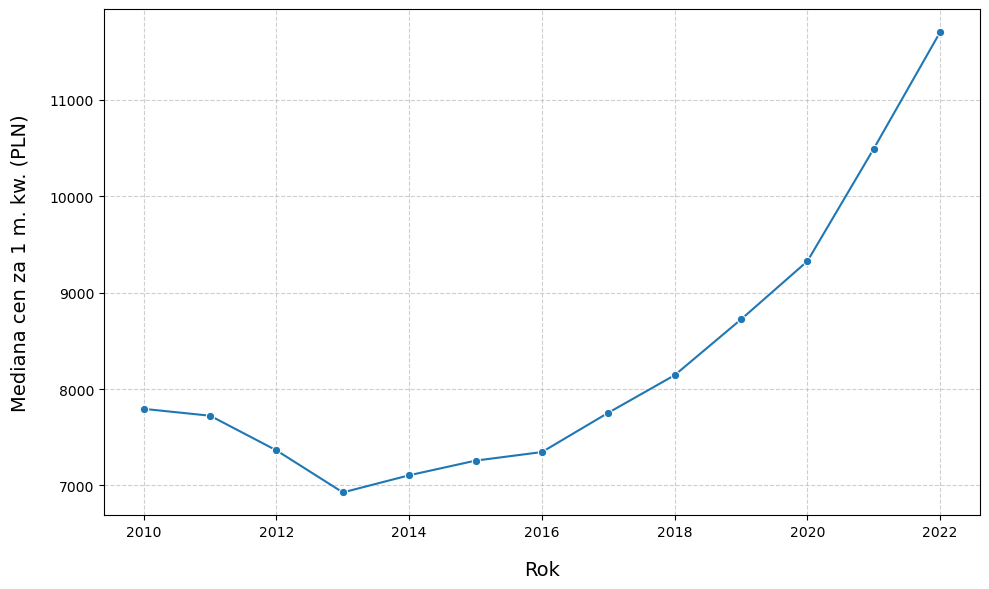

In [4]:
# Tworzenie wykresu liniowego
plt.figure(figsize=(10, 6))
sns.lineplot(data=wzrost_cen, x='Rok', y='Cena', marker='o')

# Dodanie tytułu i etykiet osi
plt.title('', fontsize=16, fontweight='bold')
plt.xlabel('Rok', fontsize=14, labelpad=15)
plt.ylabel('Mediana cen za 1 m. kw. (PLN)', fontsize=14, labelpad=15)

# Dodanie siatki
plt.grid(True, linestyle='--', alpha=0.6)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

In [5]:
#wczytanie danych
np.random.seed(42)
avg_earnings = pd.read_excel('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/Przecietne_wynagrodzenia_wojewodztwa.xlsx')
avg_earnings

Kod               Region  Wynagrodzenie
0         0               POLSKA        6705.62
1    200000         DOLNOŚLĄSKIE        6945.01
2    400000   KUJAWSKO-POMORSKIE        5888.55
3    600000            LUBELSKIE        5909.60
4    800000             LUBUSKIE        6014.38
5   1000000              ŁÓDZKIE        6210.68
6   1200000          MAŁOPOLSKIE        6824.68
7   1400000          MAZOWIECKIE        7913.14
8   1600000             OPOLSKIE        6134.18
9   1800000         PODKARPACKIE        5662.53
10  2000000            PODLASKIE        6012.94
11  2200000            POMORSKIE        6696.84
12  2400000              ŚLĄSKIE        6727.57
13  2600000       ŚWIĘTOKRZYSKIE        5782.60
14  2800000  WARMIŃSKO-MAZURSKIE        5674.89
15  3000000        WIELKOPOLSKIE        6019.68
16  3200000   ZACHODNIOPOMORSKIE        6169.94

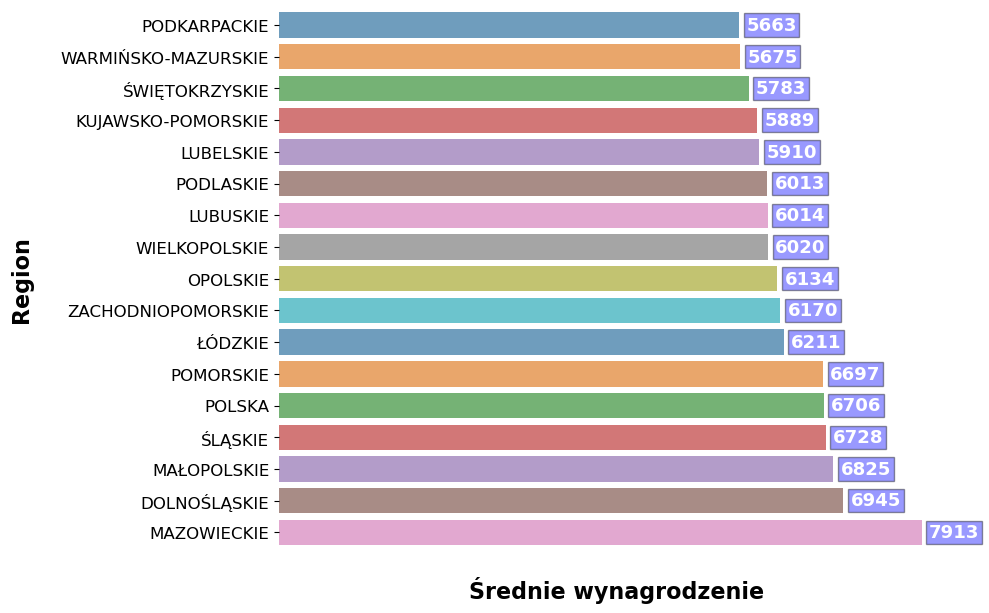

In [45]:
#Barplot w podziale na województwa
avg_earnings.sort_values(by = 'Wynagrodzenie', ascending = True, inplace = True)
plt.figure(figsize = (10,7))
ax = sns.barplot(data = avg_earnings, y = 'Region', x = 'Wynagrodzenie', palette = 'tab10', alpha = 0.7)
for index, value in enumerate(avg_earnings['Wynagrodzenie']):
    plt.text(value+400, index, f'{value:.0f}', ha = 'center', color = 'white', 
             va = 'center', fontsize = 13, fontweight = 'bold', bbox=dict(facecolor='blue', alpha=0.4, pad=2))
plt.xticks(rotation=45)
plt.title('',loc = 'center',x = 0.5 ,fontsize = 19, pad = 20, fontweight = 'bold')
plt.xlabel('Średnie wynagrodzenie', fontsize = 16, labelpad = 20, fontweight = 'bold')
plt.ylabel('Region', fontsize = 16, labelpad = 20, fontweight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelsize=12)
ax.set_xticks([])
plt.xticks(rotation=45)
ax.set_xticklabels([])
plt.subplots_adjust(right=.8) 
ax.grid(False)
plt.show()

In [7]:
import geopandas as gpd
#https://simplemaps.com/data/pl-cities
miasta = pd.read_excel('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/pl.xlsx')
miasta = miasta[miasta['population']>=50000]
miasta = gpd.GeoDataFrame(
    miasta, geometry=gpd.points_from_xy(miasta.lng, miasta.lat))
miasta.set_crs(epsg=4326, inplace=True)

# Wyświetlanie GeoDataFrame
print(miasta)

               city      lat      lng country iso2     admin_name  capital  \
0            Warsaw  52.2300  21.0111  Poland   PL    Mazowieckie  primary   
1            Kraków  50.0614  19.9372  Poland   PL    Małopolskie    admin   
2           Wrocław  51.1100  17.0325  Poland   PL   Dolnośląskie    admin   
3              Łódź  51.7769  19.4547  Poland   PL        Łódzkie    admin   
4            Poznań  52.4083  16.9336  Poland   PL  Wielkopolskie    admin   
..              ...      ...      ...     ...  ...            ...      ...   
60         Świdnica  50.8500  16.4833  Poland   PL   Dolnośląskie    minor   
61        Bełchatów  51.3667  19.3667  Poland   PL        Łódzkie    minor   
62        Legionowo  52.4000  20.8833  Poland   PL    Mazowieckie    minor   
63  Piekary Śląskie  50.3833  18.9500  Poland   PL        Śląskie    minor   
64            Rumia  54.5667  18.4000  Poland   PL      Pomorskie      NaN   

    population  population_proper                   geometry  


In [8]:
#wczytanie danych dotyczących wynagrodzeń w powiatach
avg_earnings_powiat = pd.read_excel('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/Powiaty_wynagrodzenie.xlsx')
avg_earnings_powiat

Kod                 Region  Wynagrodzenie
0          0                 POLSKA        6705.62
1     200000           DOLNOŚLĄSKIE        6945.01
2     201000   Powiat bolesławiecki        6181.60
3     202000  Powiat dzierżoniowski        5723.65
4     203000       Powiat głogowski        5856.76
..       ...                    ...            ...
392  3217000         Powiat wałecki        5886.05
393  3218000         Powiat łobeski        5630.58
394  3261000     Powiat m. Koszalin        6054.77
395  3262000     Powiat m. Szczecin        6943.84
396  3263000  Powiat m. Świnoujście        6061.29

[397 rows x 3 columns]

In [9]:
jed = gpd.read_file('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/A02_Granice_powiatow.shp', encoding='utf8')

In [10]:
jed['JPT_KOD_JE'].unique()

array(['2612', '1813', '1404', '2609', '1608', '1815', '2417', '2818',
       '1020', '0803', '1609', '0404', '2611', '3006', '1201', '3002',
       '0224', '1430', '3064', '1434', '1607', '1421', '3025', '2404',
       '1407', '3218', '2817', '0213', '1063', '2812', '1013', '1208',
       '2814', '2401', '1605', '1403', '2412', '2209', '2004', '1416',
       '2406', '3214', '3063', '2407', '2607', '2414', '0610', '3213',
       '1809', '0264', '2061', '1417', '3012', '1812', '2604', '0614',
       '2212', '1016', '2804', '0217', '3009', '1263', '2606', '0265',
       '0225', '2478', '3215', '0810', '3062', '2208', '0804', '1805',
       '0617', '2203', '1204', '2661', '2469', '1425', '3027', '3210',
       '1465', '0215', '2210', '0612', '3018', '1864', '1261', '0216',
       '3026', '2463', '0664', '1438', '0220', '2205', '2602', '2215',
       '2201', '2207', '1409', '2416', '1818', '0620', '3022', '0464',
       '3030', '1021', '1411', '2010', '3005', '2261', '3208', '2263',
      

In [11]:
avg_earnings_powiat['Kod'].unique()

array([      0,  200000,  201000,  202000,  203000,  204000,  205000,
        206000,  207000,  208000,  209000,  210000,  211000,  212000,
        213000,  214000,  215000,  216000,  217000,  218000,  219000,
        220000,  221000,  222000,  223000,  224000,  225000,  226000,
        261000,  262000,  264000,  265000,  400000,  401000,  402000,
        403000,  404000,  405000,  406000,  407000,  408000,  409000,
        410000,  411000,  412000,  413000,  414000,  415000,  416000,
        417000,  418000,  419000,  461000,  462000,  463000,  464000,
        600000,  601000,  602000,  603000,  604000,  605000,  606000,
        607000,  608000,  609000,  610000,  611000,  612000,  613000,
        614000,  615000,  616000,  617000,  618000,  619000,  620000,
        661000,  662000,  663000,  664000,  800000,  801000,  802000,
        803000,  804000,  805000,  806000,  807000,  808000,  809000,
        810000,  811000,  812000,  861000,  862000, 1000000, 1001000,
       1002000, 1003

In [12]:
def correct(row):
    if row['JPT_KOD_JE'][0]=='0':
        return row['JPT_KOD_JE'][1:]+'000'
    else:
        return row['JPT_KOD_JE']+'000'

In [13]:
jed['Kod']=jed.apply(lambda row: correct(row), axis=1)

In [14]:
jed['Kod']

0      2612000
1      1813000
2      1404000
3      2609000
4      1608000
        ...   
375    3206000
376    2613000
377    1817000
378    1210000
379    3020000
Name: Kod, Length: 380, dtype: object

In [15]:
avg_earnings_powiat['Kod']=avg_earnings_powiat['Kod'].astype(str)

In [16]:
jed.shape

(380, 36)

In [17]:
df=jed.merge(avg_earnings_powiat, on='Kod')

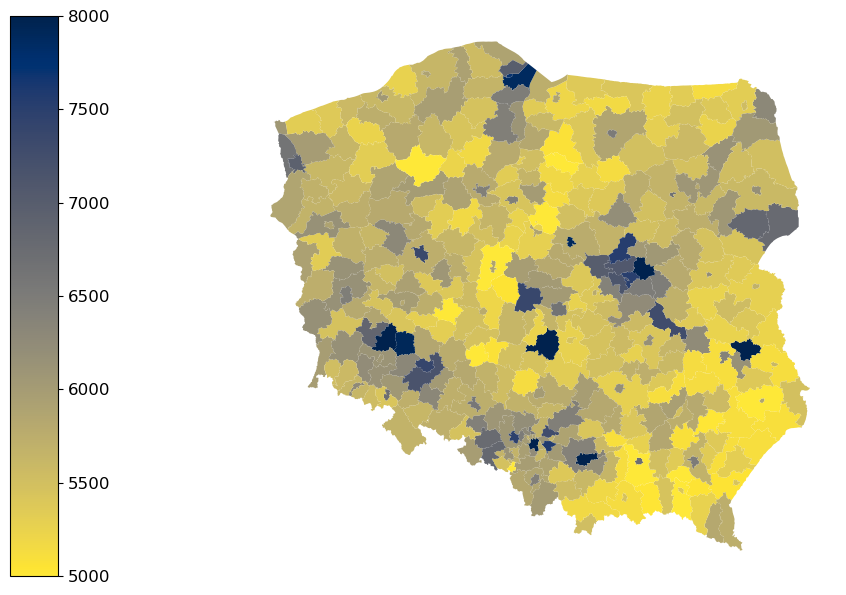

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))

# Usunięcie linii siatki
ax.grid(False)

# Usunięcie wartości osi
ax.set_xticks([])
ax.set_yticks([])

# Usunięcie etykiet osi
ax.set_xlabel('')
ax.set_ylabel('')

# Usunięcie obramowania wykresu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Tworzenie kolorowej legendy (colorbar)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.01)
# Rysowanie mapy z odwróconą mapą kolorów (cmap)
df.plot(column='Wynagrodzenie', ax=ax, cmap='cividis_r', vmax=8000, vmin=5000, legend=True, cax=cax)

# Dostosowanie rozmiaru ticków na colorbar
cax.tick_params(labelsize=12)

# Dostosowanie marginesów figury
plt.subplots_adjust(left=0.05, right=.8, top=0.9, bottom=0.1)

plt.show()


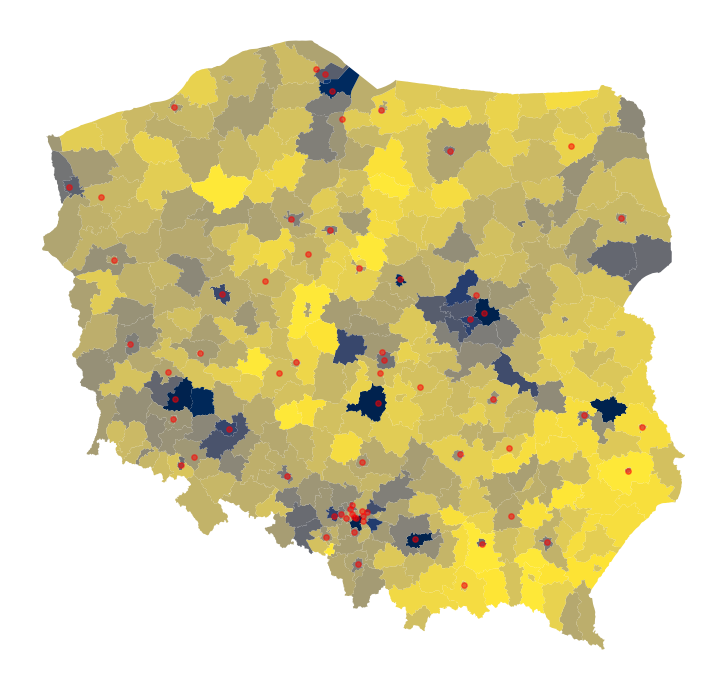

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Usunięcie linii siatki
ax.grid(False)

# Usunięcie wartości osi
ax.set_xticks([])
ax.set_yticks([])

# Usunięcie etykiet osi
ax.set_xlabel('')
ax.set_ylabel('')

# Usunięcie obramowania wykresu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

# Rysowanie mapy z odwróconą mapą kolorów (cmap)
df.plot(column='Wynagrodzenie', ax=ax, cmap='cividis_r', vmax=8000, vmin=5000, legend=True, cax=cax)
miasta.plot(ax=ax,marker = 'o' , color='red', markersize=15, alpha = 0.5)

plt.show()

In [5]:
#https://www.kaggle.com/datasets/jszafranqb/justjoinit-job-offers-data-2021-10-2023-09?resource=download
import json

file_path = r'C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/justjoin/2023-09-25.json'

def filter_data(data, city):
    return [item for item in data if item.get('city') == city]

try:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)

    warsaw_data = filter_data(data, 'Warszawa')
    
    for item in warsaw_data:
        print(item)
except PermissionError:
    print("Brak uprawnień do odczytu pliku. Spróbuj uruchomić skrypt jako administrator.")
except FileNotFoundError:
    print("Plik nie został znaleziony. Sprawdź ścieżkę do pliku.")
except Exception as e:
    print(f"Wystąpił błąd: {e}")



{'title': 'QA Engineer', 'street': 'aleje jerozolimskie', 'city': 'Warszawa', 'country_code': 'PL', 'address_text': 'aleje jerozolimskie, Warszawa', 'marker_icon': 'testing', 'workplace_type': 'remote', 'company_name': 'Onoco', 'company_url': 'https://onoco.com', 'company_size': '5-10', 'experience_level': 'mid', 'latitude': '52.2072628', 'longitude': '20.945304', 'published_at': '2023-09-25T16:44:18.741Z', 'remote_interview': True, 'open_to_hire_ukrainians': True, 'id': 'onoco-qa-engineer-warszawa', 'display_offer': True, 'employment_types': [{'type': 'b2b', 'salary': {'from': 7000, 'to': 11000, 'currency': 'pln'}}], 'company_logo_url': 'https://bucket.justjoin.it/offers/company_logos/thumb_x2/b5abf2d1a4d6586a38fcc0940ab5bbc87fed8a62.png?1695660112', 'skills': [{'name': 'JIRA', 'level': 1}, {'name': 'Postman', 'level': 1}, {'name': 'Testing', 'level': 4}], 'remote': True, 'multilocation': [{'city': 'Warszawa', 'street': 'aleje jerozolimskie', 'slug': 'onoco-qa-engineer-warszawa'}], 'w

In [6]:
def extract_relevant_data(item):
    employment_type = item.get('employment_types', [{}])[0]
    salary = employment_type.get('salary', {}) or {}
    return {
        'title': item.get('title'),
        'experience_level': item.get('experience_level'),
        'latitude': item.get('latitude'),
        'longitude': item.get('longitude'),
        'marker_icon': item.get('marker_icon'),
        'remote': item.get('remote'),
        'salary_from': salary.get('from'),
        'salary_to': salary.get('to'),
        'currency': salary.get('currency'),
        'company_name': item.get('company_name'),
        'city': item.get('city')
    }
relevant_data = [extract_relevant_data(item) for item in warsaw_data]
    
# Stworzenie DataFrame
just_join = pd.DataFrame(relevant_data)
just_join.tail()

title experience_level    latitude  \
2310  Fullstack Developer (Node.JS & React)              mid  52.2302091   
2311                      ERP Administrator              mid  52.2302091   
2312                          SAP Developer              mid  52.2302091   
2313       Unreal Engine or Unity Developer              mid  52.2302091   
2314  Technical Project Manager with German              mid  52.2296756   

       longitude marker_icon  remote  salary_from  salary_to currency  \
2310  21.0113922  javascript    True      14500.0    22500.0      pln   
2311  21.0113922         erp    True          NaN        NaN     None   
2312  21.0113922         erp    True          NaN        NaN     None   
2313  21.0113922      mobile    True          NaN        NaN     None   
2314  21.0122287          pm   False      20000.0    30000.0      pln   

                    company_name      city  
2310                     Mindpal  Warszawa  
2311  Randstad Polska Sp. z o.o.  Warszawa  
2312                     Mindpal  Warszawa  
2313                     Mindpal  Warszawa  
2314                      Devire  Warszawa

In [7]:
just_join.shape

(2315, 11)

In [8]:
just_join = just_join.dropna()

In [9]:
just_join.shape

(1398, 11)

In [10]:
just_join['salary_avg'] = just_join[['salary_from', 'salary_to']].mean(axis=1)
just_join.head()

title experience_level    latitude  \
0                          QA Engineer              mid  52.2072628   
1        Senior Test Engineer (mobile)           senior  52.1816941   
2  Release Engineer - 1st or 2nd shift              mid  52.2296756   
3             Senior Tech Lead (m/f/d)           senior  52.2103327   
8                     Product Designer           senior  52.2302091   

    longitude marker_icon  remote  salary_from  salary_to currency  \
0   20.945304     testing    True       7000.0    11000.0      pln   
1  21.0216558      mobile    True      25200.0    28560.0      pln   
2  21.0122287      mobile    True      16000.0    19000.0      pln   
3  20.9527453        java   False      28000.0    35000.0      pln   
8  21.0113922          ux    True       5000.0     7000.0      usd   

              company_name      city  salary_avg  
0                    Onoco  Warszawa      9000.0  
1                       7N  Warszawa     26880.0  
2  Qurate Retail Group GBS  Warszawa     17500.0  
3                    DATEV  Warszawa     31500.0  
8            Housecall Pro  Warszawa      6000.0

In [11]:
just_join = just_join[just_join['currency']== 'pln']

In [12]:
just_join.shape

(1312, 12)

In [13]:
high_salary_jobs = just_join[just_join['salary_avg'] > 60000]
high_salary_jobs

title experience_level    latitude  \
319  React Native Developer - Saudi Arabia           senior  52.2303835   

      longitude marker_icon  remote  salary_from  salary_to currency  \
319  21.0015105  javascript   False      50000.0    75600.0      pln   

    company_name      city  salary_avg  
319         ITDS  Warszawa     62800.0

In [14]:
grouped_data = just_join.groupby('remote').size().reset_index(name='count')
grouped_data['remote'] = grouped_data['remote'].astype(str).str.upper()
grouped_data['remote'] = grouped_data['remote'].replace({'TRUE': 'Praca zdalna', 'FALSE': 'Praca stacjonarna'})

fig = px.pie(grouped_data, values='count', names='remote', title='Oferty pracy w sektorze IT w Warszawie z podziałem na formę pracy')
fig.show()

In [15]:
grouped_data = just_join.groupby('marker_icon').size().reset_index(name='count')
grouped_data['marker_icon'] = grouped_data['marker_icon'].str.upper()
fig = px.pie(grouped_data, values='count', names='marker_icon', title='')
fig.show()

In [18]:
grouped_data = just_join.groupby('marker_icon').size().reset_index(name='count')
top_5_groups = grouped_data.nlargest(5, 'count')
avg_salary_data = just_join[just_join['marker_icon'].isin(top_5_groups['marker_icon'])]
avg_salary_data = avg_salary_data.groupby('marker_icon')['salary_avg'].mean().reset_index()
avg_salary_data['marker_icon'] = avg_salary_data['marker_icon'].str.upper()

fig = px.bar(avg_salary_data, x='marker_icon', y='salary_avg', color='salary_avg', 
             labels={'salary_avg': 'Średnie wynagrodzenie', 'marker_icon': 'Sektor IT'}, height=400, template='ggplot2',
             title='')
fig.show()

In [24]:
# Grupa według technologii
grouped_data_technology = just_join.groupby('marker_icon').size().reset_index(name='count')
top_5_groups = grouped_data_technology.nlargest(5, 'count')
avg_salary_data_technology = just_join[just_join['marker_icon'].isin(top_5_groups['marker_icon'])]
avg_salary_data_technology = avg_salary_data_technology.groupby(['marker_icon', 'experience_level'])['salary_avg'].mean().reset_index()
avg_salary_data_technology['marker_icon'] = avg_salary_data_technology['marker_icon'].str.upper()
avg_salary_data_technology['experience_level'] = avg_salary_data_technology['experience_level'].str.upper()

# Tworzenie wykresu liniowego
fig = px.line(avg_salary_data_technology, x='experience_level', y='salary_avg', color='marker_icon', 
              labels={'salary_avg': 'Średnie wynagrodzenie', 'experience_level': 'Poziom doświadczenia', 'marker_icon': 'Technologia'},
              title='',
              markers=True, template='plotly')

# Dodanie linii trendu dla każdej technologii
fig.update_traces(line=dict(dash='dot', width=2))

fig.show()

In [20]:
grouped_data = just_join.groupby('experience_level').size().reset_index(name='count')
avg_salary_data = just_join[just_join['experience_level'].notnull()]
avg_salary_data = avg_salary_data.groupby('experience_level')['salary_avg'].mean().reset_index()
avg_salary_data['experience_level'] = avg_salary_data['experience_level'].str.upper()

fig = px.bar(avg_salary_data, x='experience_level', y='salary_avg', color='salary_avg', 
             labels={'salary_avg': 'Średnie wynagrodzenie', 'experience_level': 'Poziom doświadczenia'}, height=400, template='plotly',
             title='Średnie wynagrodzenie w sektorze IT w Warszawie według poziomu doświadczenia')
fig.show()



In [25]:
grouped_data = just_join.groupby('remote').size().reset_index(name='count')
avg_salary_data = just_join[just_join['remote'].notnull()]
avg_salary_data = avg_salary_data.groupby('remote')['salary_avg'].mean().reset_index()
avg_salary_data['remote'] = avg_salary_data['remote'].replace({True: 'Praca zdalna', False: 'Praca stacjonarna'})

fig = px.bar(avg_salary_data, x='remote', y='salary_avg', color='salary_avg', 
             labels={'salary_avg': 'Średnie wynagrodzenie', 'remote': 'Forma pracy'}, height=400, template='simple_white',
             title='')
fig.show()



In [34]:
import pandas as pd

# Wczytanie danych
mieszkania = pd.read_excel('C:/Users/Mariusz/OneDrive/Pulpit/Studia6/Python/Projekt/mieszkania_powiaty.xlsx')

# Konwersja kolumny 'Cena' na typ liczbowy, jeśli to konieczne
mieszkania['Cena'] = pd.to_numeric(mieszkania['Cena'], errors='coerce')

# Sortowanie danych według kolumny 'Cena' w porządku rosnącym i przypisanie wyniku do zmiennej
mieszkania = mieszkania.sort_values(by='Cena', ascending=True)

# Wyświetlenie posortowanych danych
print(mieszkania)


         Kod                           Nazwa   Cena
111  1015000            Powiat skierniewicki      0
190  1603000  Powiat kędzierzyńsko-kozielski   1541
13    212000                 Powiat lwówecki   2146
393  3218000                  Powiat łobeski   2186
5     204000                 Powiat górowski   2373
..       ...                             ...    ...
382  3207000                Powiat kamieński  11060
380  3205000                 Powiat gryficki  11512
186  1465000          Powiat m. st. Warszawa  11705
138  1217000               Powiat tatrzański  14594
264  2264000                 Powiat m. Sopot  15079

[396 rows x 3 columns]


In [26]:
# Filtracja danych dla sektora 'data'
data_jobs = just_join[just_join['marker_icon'] == 'data']

# Grupowanie danych według 'remote'
grouped_data = data_jobs.groupby('remote').size().reset_index(name='count')
grouped_data['remote'] = grouped_data['remote'].astype(str).str.upper()
grouped_data['remote'] = grouped_data['remote'].replace({'TRUE': 'PRACA ZDALNA', 'FALSE': 'PRACA STACJONARNA'})

# Tworzenie wykresu kołowego z niestandardowymi kolorami
fig = px.pie(grouped_data, values='count', names='remote', 
             title='',
             color_discrete_map={'PRACA ZDALNA': 'blue', 'PRACA STACJONARNA': 'orange'})
fig.show()



In [36]:
# Filtracja danych dla stanowisk "mid" w obszarze "data"
junior_data_jobs = just_join[(just_join['experience_level'] == 'junior') & (just_join['marker_icon'] == 'data')]

# Obliczenie średniego wynagrodzenia
average_salary_junior_data = junior_data_jobs['salary_avg'].mean()

average_salary_junior_data


8833.333333333334

In [37]:
mieszkania['60m'] = mieszkania['Cena']*60
jedna_trzecia = (1/3)*average_salary_junior_data
mieszkania['czas_kupna_lata'] = mieszkania['60m']/(jedna_trzecia*12)

In [38]:
mieszkania

Kod                           Nazwa   Cena     60m  czas_kupna_lata
111  1015000            Powiat skierniewicki      0       0         0.000000
190  1603000  Powiat kędzierzyńsko-kozielski   1541   92460         2.616792
13    212000                 Powiat lwówecki   2146  128760         3.644151
393  3218000                  Powiat łobeski   2186  131160         3.712075
5     204000                 Powiat górowski   2373  142380         4.029623
..       ...                             ...    ...     ...              ...
382  3207000                Powiat kamieński  11060  663600        18.781132
380  3205000                 Powiat gryficki  11512  690720        19.548679
186  1465000          Powiat m. st. Warszawa  11705  702300        19.876415
138  1217000               Powiat tatrzański  14594  875640        24.782264
264  2264000                 Powiat m. Sopot  15079  904740        25.605849

[396 rows x 5 columns]

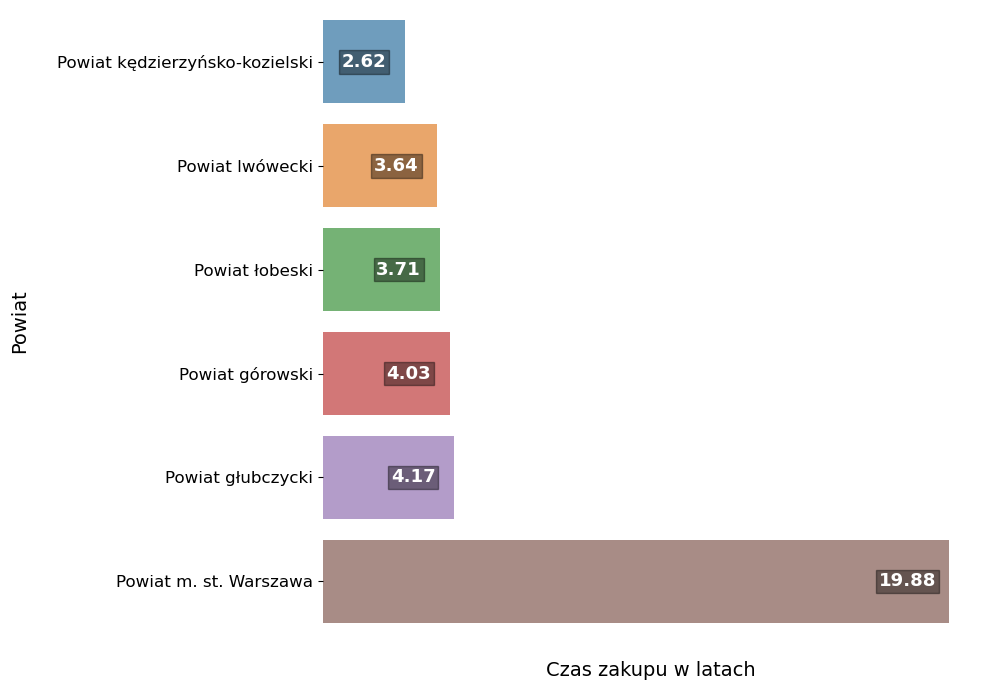

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Zakładam, że ramka danych 'mieszkania' jest już wczytana

# Filtracja danych
top_5_shortest_time = mieszkania[mieszkania['Nazwa'] != 'Powiat skierniewicki'].nsmallest(5, 'czas_kupna_lata')
warsaw = mieszkania[mieszkania['Nazwa'] == 'Powiat m. st. Warszawa']
filtered_data = pd.concat([top_5_shortest_time, warsaw])

# Sortowanie danych według 'czas_kupna_lata'
filtered_data.sort_values(by='czas_kupna_lata', ascending=True, inplace=True)

# Stworzenie wykresu słupkowego
plt.figure(figsize=(10, 7))
ax = sns.barplot(data=filtered_data, y='Nazwa', x='czas_kupna_lata', palette='tab10', alpha=0.7)

# Dodanie etykiet na słupkach
for index, value in enumerate(filtered_data['czas_kupna_lata']):
    plt.text(value -1.3, index, f'{value:.2f}', ha='center', color='white', 
             va='center', fontsize=13, fontweight='bold', bbox=dict(facecolor='black', alpha=0.4, pad=2))

# Dodanie tytułu i etykiet osi
plt.xlabel('Czas zakupu w latach', fontsize=14, labelpad=20)
plt.ylabel('Powiat', fontsize=14, labelpad=20)

# Ukrycie niektórych elementów osi
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(labelsize=12)
ax.set_xticks([])

plt.tight_layout()
plt.show()





In [40]:
mieszkania['Kod']=mieszkania['Kod'].astype(str) 
jed.shape  
df=jed.merge(mieszkania, on='Kod')
df

JPT_SJR_KO  JPT_POWIER JPT_KOD_JE           JPT_NAZWA_ JPT_ORGAN_  \
0          POW     92503.0       2612    powiat staszowski       None   
1          POW    121117.0       1813     powiat przemyski       None   
2          POW     61486.0       1404   powiat gostyniński       None   
3          POW     67588.0       2609  powiat sandomierski       None   
4          POW     97339.0       1608        powiat oleski       None   
..         ...         ...        ...                  ...        ...   
374        POW    186911.0       3206     powiat gryfiński       None   
375        POW     90638.0       2613  powiat włoszczowski       None   
376        POW    115643.0       1817       powiat sanocki       None   
377        POW    154992.0       1210   powiat nowosądecki       None   
378        POW     71323.0       3020    powiat pleszewski       None   

     JPT_JOR_ID   WERSJA_OD WERSJA_DO    WAZNY_OD WAZNY_DO  ... JPT_GEOM_1  \
0         13419  2020-08-12      None  2012-09-26     None  ...        0.0   
1         13415  2024-02-25      None  2012-09-26     None  ...        0.0   
2         13409  2012-09-26      None  2012-09-26     None  ...        0.0   
3         13419  2020-08-12      None  2012-09-26     None  ...        0.0   
4         13416  2021-05-14      None  2012-09-26     None  ...        0.0   
..          ...         ...       ...         ...      ...  ...        ...   
374       13423  2022-10-26      None  2012-09-26     None  ...        0.0   
375       13419  2012-09-26      None  2012-09-26     None  ...        0.0   
376       13415  2022-12-06      None  2017-01-01     None  ...        0.0   
377       13412  2022-12-06      None  2012-09-26     None  ...        0.0   
378       13417  2016-10-21      None  2012-09-26     None  ...        0.0   

    Shape_Leng Shape_Area           REGON  \
0     2.889979   0.117302  83040924100000   
1     3.322279   0.151158  65090031200000   
2     2.435771   0.081143  61101610000000   
3     2.007003   0.085971  83040923500000   
4     2.938225   0.124405  53246335000000   
..         ...        ...             ...   
374   3.588813   0.250291  81168396500000   
375   2.881157   0.115640  29100940300000   
376   2.432578   0.143427  37044070300000   
377   3.712747   0.192594  49189318000000   
378   2.207309   0.093165  25085480800000   

                                              geometry      Kod  \
0    MULTIPOLYGON (((21.08325 50.49793, 21.08301 50...  2612000   
1    POLYGON ((22.97953 49.94940, 22.98074 49.94895...  1813000   
2    POLYGON ((19.49988 52.52596, 19.50568 52.52378...  1404000   
3    POLYGON ((21.81814 50.87689, 21.81814 50.87687...  2609000   
4    POLYGON ((18.54810 51.14107, 18.54917 51.14076...  1608000   
..                                                 ...      ...   
374  POLYGON ((14.63054 53.36600, 14.63117 53.36599...  3206000   
375  POLYGON ((19.88346 51.04761, 19.88400 51.04758...  2613000   
376  POLYGON ((22.32885 49.67943, 22.32871 49.67925...  1817000   
377  POLYGON ((20.70108 49.80527, 20.70144 49.80525...  1210000   
378  MULTIPOLYGON (((17.60422 51.82022, 17.60427 51...  3020000   

                   Nazwa  Cena     60m czas_kupna_lata  
0      Powiat staszowski  4152  249120        7.050566  
1       Powiat przemyski  3091  185460        5.248868  
2     Powiat gostyniński  5386  323160        9.146038  
3    Powiat sandomierski  5325  319500        9.042453  
4          Powiat oleski  3950  237000        6.707547  
..                   ...   ...     ...             ...  
374     Powiat gryfiński  4597  275820        7.806226  
375  Powiat włoszczowski  4958  297480        8.419245  
376       Powiat sanocki  5617  337020        9.538302  
377   Powiat nowosądecki  5017  301020        8.519434  
378    Powiat pleszewski  4158  249480        7.060755  

[379 rows x 40 columns]

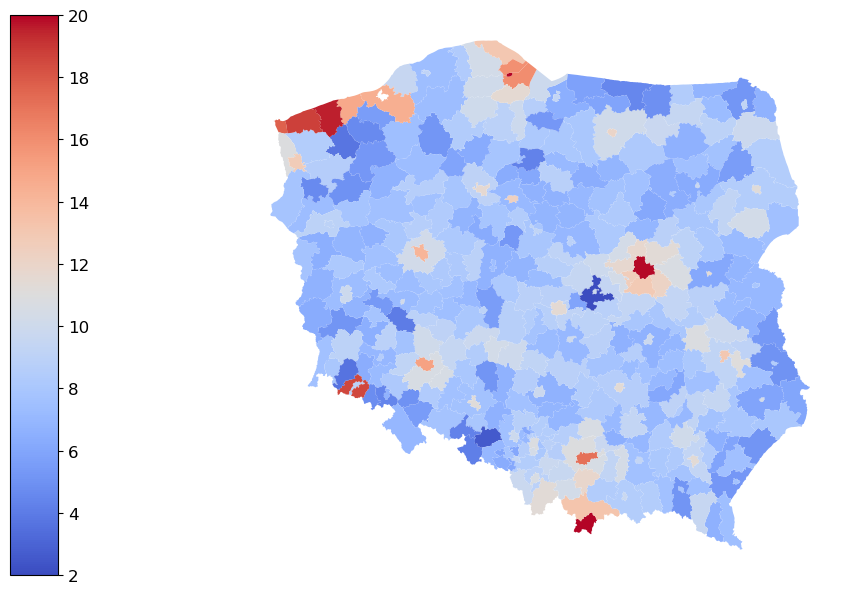

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
# Usunięcie linii siatki
ax.grid(False)

# Usunięcie wartości osi
ax.set_xticks([])
ax.set_yticks([])

# Usunięcie etykiet osi
ax.set_xlabel('')
ax.set_ylabel('')

# Usunięcie obramowania wykresu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Tworzenie kolorowej legendy (colorbar)
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.01)
# Rysowanie mapy z odwróconą mapą kolorów (cmap)
df.plot(column='czas_kupna_lata', ax=ax, cmap='coolwarm', vmax=20, vmin=2, legend=True, cax=cax)

# Dostosowanie rozmiaru ticków na colorbar
cax.tick_params(labelsize=12)

# Dostosowanie marginesów figury
plt.subplots_adjust(left=0.05, right=.8, top=0.9, bottom=0.1)

plt.show()

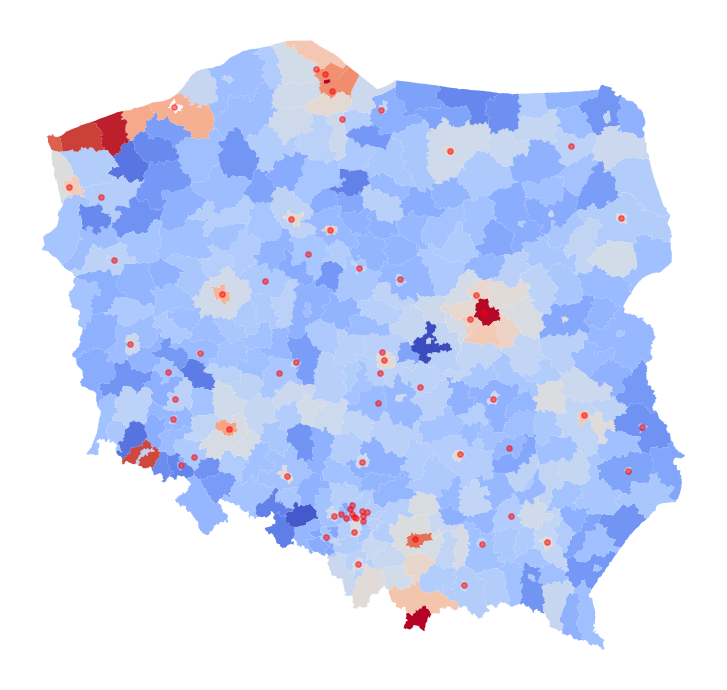

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Usunięcie linii siatki
ax.grid(False)

# Usunięcie wartości osi
ax.set_xticks([])
ax.set_yticks([])

# Usunięcie etykiet osi
ax.set_xlabel('')
ax.set_ylabel('')

# Usunięcie obramowania wykresu
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.tight_layout()

# Rysowanie mapy z odwróconą mapą kolorów (cmap)
df.plot(column='czas_kupna_lata', ax=ax, cmap='coolwarm', vmax=20, vmin=2, legend=True, cax=cax)
miasta.plot(ax=ax,marker = 'o' , color='red', markersize=15, alpha = 0.5)

plt.show()